In [2]:
import trait2d as tr
#import trait2d_minflux.minflux as mf
from trait2d.analysis.minflux import importPKL, openPKL
import pandas as pd
import trait2d.analysis.minflux as mf


###Ignore a warning which is only relevant for legacy files
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#display option for my mental health
pd.set_option('display.precision',12)

### The importPKL function works well with the old format, but not with the new, so it needs to be worked around a bit

In [3]:
old = importPKL(name = 'oldformat.pkl')

In [4]:
new = importPKL(name = 'newformat.pkl')

In [5]:
from trait2d.analysis.minflux import MFTrack

for i in range(len(old)):
    xx = mf.MFTrack.from_importPKL(old[i])

In [6]:
from trait2d.analysis.minflux import MFTrackDB

masso = MFTrackDB.from_pkl('.','newformat.pkl')

In [7]:
type(masso._tracks[1])

trait2d.analysis.minflux.MFTrack

In [11]:
masso.adc_analysis();

In [98]:
ModelDB().models[:].__class__.__name__


'list'

In [122]:
for track in masso._tracks:
    print(track._adc_analysis_results['best_model'])

ModelHop
ModelHop
None
ModelHop
ModelHop
ModelHop
ModelConfined
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop


In [227]:
import trait2d.analysis.minflux as mf

tf = masso.adc_analysis(max_index = 500, fraction_fit_points = 0.1,maxfev = 5000)

tf2 = masso.MF_model_average(max_index = 500, fraction_fit_points = 0.1,maxfev = 5000)

In [228]:
tf2['sectors']

[('ModelHop', 16)]

In [209]:
import trait2d.analysis.minflux as mf

masso.adc_summary()

Use MF_adc_summary instead!


In [213]:
len(masso._tracks)

17

In [71]:
from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelConfined, ModelHop

if len(ModelDB().models) !=0:
    ModelDB().cleanup()


ModelDB().add_model(ModelBrownian)
ModelDB().add_model(ModelConfined)
ModelDB().add_model(ModelHop)

In [67]:
ModelDB().models[0].R

0.0

In [28]:
masso._tracks[4]._adc_analysis_results

{'Dapp': array([3.33857183e-12, 1.44248571e-12, 1.14884573e-12, ...,
        3.78636432e-13, 3.54713118e-13, 3.96052353e-13]),
 'Dapp_err': array([7.96221738e-15, 1.95414077e-15, 1.89830338e-15, ...,
        8.88925793e-15, 1.01676936e-15, 0.00000000e+00]),
 'fit_indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 12

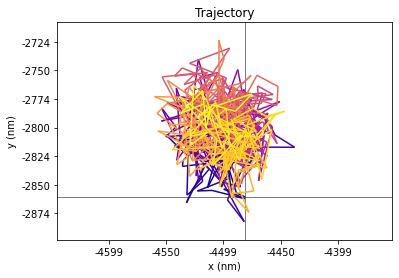

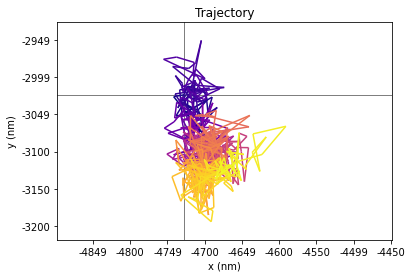

ValueError: Axis limits cannot be NaN or Inf

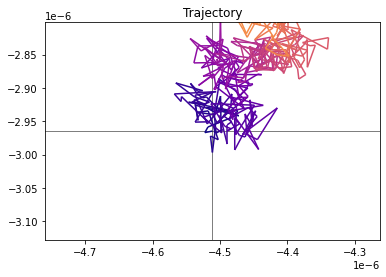

In [32]:
for track in masso._tracks:
    track.plot_trajectory()

In [19]:
xx.get_x()

array([-2.32726616e-06, -2.33538389e-06, -2.31551050e-06, ...,
       -2.32602114e-06, -2.31655801e-06, -2.29943665e-06])

In [20]:
old[1]

{'track':                    x               y  ...                  frq         tint
 5029 -0.000002775355  0.000004610381  ...  140140.140140140138  0.000476725
 5030 -0.000002782922  0.000004610746  ...  220220.220220220217  0.000148450
 5031 -0.000002774963  0.000004607577  ...  220220.220220220217  0.000082275
 5032 -0.000002780539  0.000004616699  ...  210210.210210210207  0.000082275
 5033 -0.000002770220  0.000004645660  ...  190190.190190190187  0.000148425
 ...              ...             ...  ...                  ...          ...
 6358 -0.000002690608  0.000004621412  ...  200200.200200200197  0.000148400
 6359 -0.000002708997  0.000004607417  ...  170170.170170170168  0.000082275
 6360 -0.000002730839  0.000004606993  ...  130130.130130130128  0.000148400
 6361 -0.000002724075  0.000004602950  ...  170170.170170170168  0.000148400
 6362 -0.000002697611  0.000004606953  ...  130130.130130130128  0.000148450
 
 [1334 rows x 6 columns],
 'tid': 1,
 'avg_frq': 201658.430044237

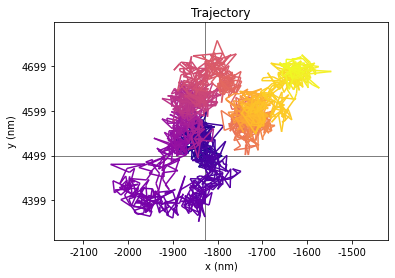

In [21]:
aaa = mf.MFTrack.from_importPKL(old[5])
aaa.plot_trajectory()

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap


fig, ax = plt.subplots(figsize = (7,7),frameon=False)
points = np.array([aaa._x,aaa._y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(aaa._t.min(),aaa._t.max(),100)
lc = LineCollection(segments, cmap='plasma',norm = norm)
line = ax.add_collection(lc)
lc.set_array(aaa._t)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cbar = fig.colorbar(line, cax=fig.add_axes([0.659, 0.22, 0.155, 0.01]), orientation = 'horizontal')
cbar.set_ticks([cbar.vmin + t*(cbar.vmax-cbar.vmin) for t in cbar.ax.get_yticks()])
cbar.set_ticklabels([t for t in cbar.ax.get_yticks()])

ax.set_xlim((aaa._x.min(),aaa._x.max()))
ax.set_ylim((aaa._y.min(),aaa._y.max()))
scalebar = mpatches.Rectangle((-1.7E-6,4.35E-6),0.1E-6,0.01E-6,facecolor='black')

ax.add_patch(scalebar)
ax.set_aspect(1.0)

In [22]:
aaa._t.max()-aaa._t.min()

0.2718573999999947

In [23]:
#x,y,z = aaa.MF_calculate_msd_cluster(use_log = False)

In [24]:
x = aaa.MF_calculate_msd()


100%|██████████| 3309/3309 [00:40<00:00, 81.71it/s]


In [25]:
aaa._adc_analysis_results

In [37]:
len(aaa._msd)

3308

In [26]:
from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelHop
ModelDB().cleanup()
ModelDB().add_model(ModelHop)
ModelDB().add_model(ModelBrownian)

In [32]:
aaa.MF_adc_analysis(weighting = 'error')

n_points =827
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

{'Dapp': array([3.21330089e-12, 1.52580306e-12, 1.05033664e-12, ...,
        7.30370926e-14, 7.47570127e-14, 7.03024518e-14]),
 'Dapp_err': array([3.48775461e-15, 1.01616853e-15, 8.48701757e-16, ...,
        2.60798143e-15, 5.21579452e-16, 0.00000000e+00]),
 'fit_indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 12

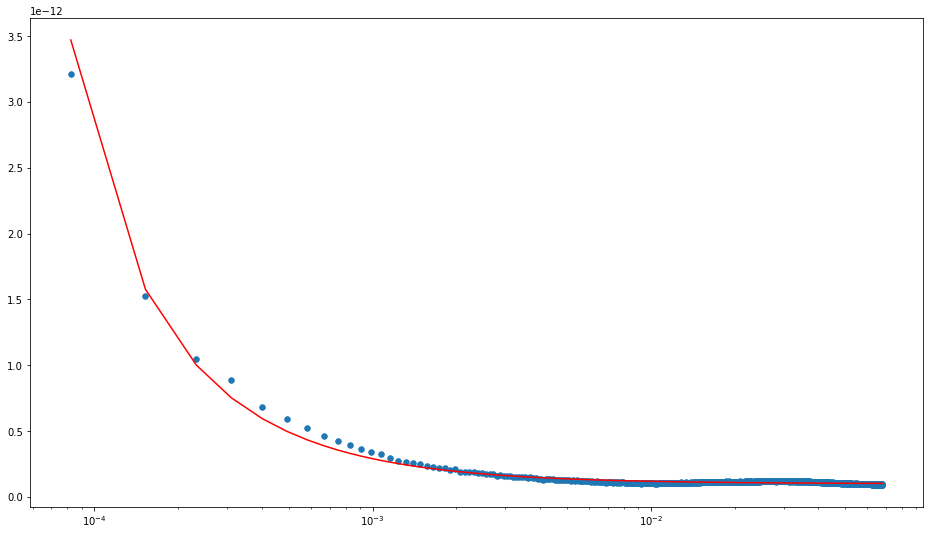

In [33]:
import matplotlib.pyplot as plt

idxs = aaa._adc_analysis_results['fit_indices']
hop_params = aaa._adc_analysis_results['fit_results']['ModelHop']['params']

fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(aaa._tn[idxs],aaa._adc[idxs],s = 30)
ax.semilogx(aaa._tn[idxs],ModelDB().models[0](aaa._tn[idxs],*hop_params),c = 'red')